In [2]:
%matplotlib inline

import warnings
import numpy as np
import pandas as pd
import scipy.stats as st
import statsmodels as sm
import matplotlib
import matplotlib.pyplot as plt

In [15]:
# Load first 500 rows from csv
df1 = pd.read_csv('../TH_Data/500_rows.csv', index_col=0)

# Load second 500 rows from csv
df2 = pd.read_csv('../TH_Data/500_2_rows.csv', index_col=0)

# Concatenate dfs
frames = [df1, df2]
df = pd.concat(frames, ignore_index=True)

# normalizing avg_ratings with MinMax and Mean
df['minmax_norm'] = 1 + (df['avg_rating'] - df['avg_rating'].min()) / (df['avg_rating'].max() - df['avg_rating'].min()) * 9
df['mean_norm'] = 1 + (df['avg_rating'] - df['avg_rating'].mean()) / (df['avg_rating'].max() - df['avg_rating'].min()) * 9

display(df.head())

,url,title,authorname,avg_rating,num_rat,num_rev,total_pages,ori_year,places,series,awards,genre3,minmax_norm,mean_norm
0,https://www.goodreads.com//book/show/13496.A_G...,A Game of Thrones,George R.R. Martin,4.44,"2,084,416","55,502",835.0,2005.0,The Lands of Ice and Fire,1,"Nebula Award Nominee for Best Novel (1997), Lo...","['Fantasy', 'Fiction', 'Fantasy']",7.230769,2.641016
1,https://www.goodreads.com//book/show/30.J_R_R_...,J.R.R. Tolkien 4-Book Boxed Set: The Hobbit an...,J.R.R. Tolkien,4.60,"114,607","1,837",1728.0,2012.0,Middle-earth,1,NaN,"['Fantasy', 'Fiction', 'Classics']",8.021978,3.432225
2,https://www.goodreads.com//book/show/186074.Th...,The Name of the Wind,Patrick Rothfuss,4.52,"759,974","43,986",662.0,2007.0,NaN,1,Locus Award Nominee for Best First Novel and B...,"['Fantasy', 'Fiction', 'Fantasy']",7.626374,3.036621
3,https://www.goodreads.com//book/show/7235533-t...,The Way of Kings,Brandon Sanderson,4.61,"334,282","22,153",1007.0,2010.0,Roshar,1,Locus Award Nominee for Best Fantasy Novel (20...,"['Fantasy', 'Fiction', 'Fantasy']",8.071429,3.481676
4,https://www.goodreads.com//book/show/11127.The...,The Chronicles of Narnia,C.S. Lewis,4.26,"545,434","10,668",767.0,2002.0,"London, England (United Kingdom)",1,NaN,"['Fantasy', 'Classics', 'Fiction']",6.340659,1.750907


([<matplotlib.axis.XTick at 0x7f16095be5b0>,
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

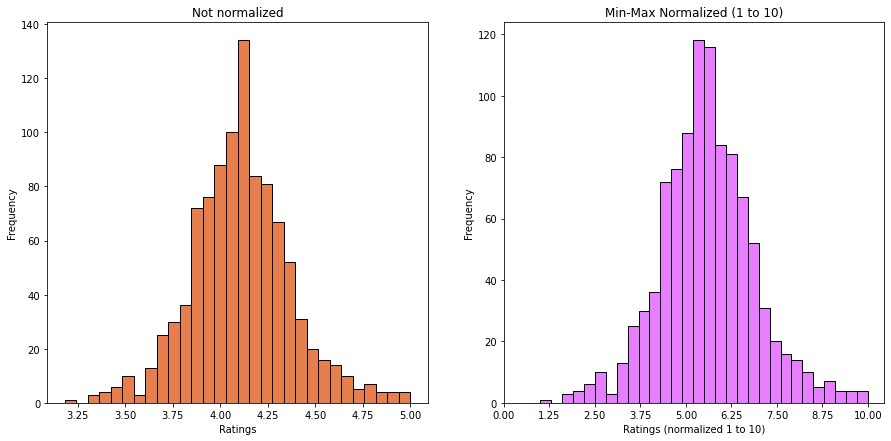

In [22]:
# Plot the Min_Max_normalization of a columnn compares with the not normalized one
fig, ax = plt.subplots(1, 2, figsize = (15,7))


ax[0].hist(df['avg_rating'], bins=30, color='#e67e4d', histtype='bar', edgecolor='black')
ax[1].hist(df['minmax_norm'], bins=30, color='#e67eff', histtype='bar', edgecolor='black')
ax[0].set_title("Not normalized")
ax[1].set_title("Min-Max Normalized (1 to 10)")
ax[0].set_xlabel('Ratings')
ax[0].set_ylabel('Frequency')
ax[1].set_xlabel('Ratings (normalized 1 to 10)')
ax[1].set_ylabel('Frequency')

# plt.sca(axes[1, 1])
# plt.xticks(range(3), ['A', 'Big', 'Cat'], color='red')

plt.sca(ax[1])
plt.xticks(np.arange(0,11.25, step=1.25))